## Import

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [3]:
from ML.utils.utils import *
from ML.utils.Data_preparator import Data_preparator
from ML.utils.Model_trainer import Model_trainer
from ML.utils.Model_evaluator import Model_evaluator
from physics.Iso_data_handler import Iso_data_handler


## Data preparation

This notebook contains the results of the model which are trained using all the data from MIST and filtered on the phases

In [4]:
iso_handler = Iso_data_handler("../../../../../../data/MIST_v1.2_vvcrit0.0_basic_isos/", 
                              ['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'phase', 'metallicity', 'star_mass', 'log_R'], 
                              "MIST", reclassify=True)

iso_df = iso_handler.get_isochrone_dataframe()
display(iso_df)

Reading MIST dataframe from csv file...


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,3.486221,3.131342,-1.0,-0.25,0.100000,0.153402
1,5.0,3.487362,3.126808,-1.0,-0.25,0.102645,0.160326
2,5.0,3.489243,3.119367,-1.0,-0.25,0.107039,0.171785
3,5.0,3.491102,3.112165,-1.0,-0.25,0.111419,0.183099
4,5.0,3.492937,3.105143,-1.0,-0.25,0.115789,0.194305
...,...,...,...,...,...,...,...
1467117,10.3,4.402490,7.777159,6.0,0.50,0.532726,-1.806255
1467118,10.3,4.387132,7.783242,6.0,0.50,0.532730,-1.809295
1467119,10.3,4.371789,7.789130,6.0,0.50,0.532735,-1.812237
1467120,10.3,4.356480,7.794844,6.0,0.50,0.532741,-1.815091


In [5]:
phase_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5]})
display(phase_filtered_iso_df)

,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
1140739,10.3,3.425746,-0.551440,5.0,0.50,0.602856,2.384899
1140740,10.3,3.426469,-0.560350,5.0,0.50,0.598549,2.387797
1140741,10.3,3.427744,-0.566057,5.0,0.50,0.594116,2.389036
1140742,10.3,3.429413,-0.569225,5.0,0.50,0.589648,2.388981


In [6]:
X_train, X_ivs, y_train, y_ivs = \
    Data_preparator.split_data(phase_filtered_iso_df, x_cols=['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'metallicity'], 
                               y_cols=['star_mass', 'log_R'], random_state=12, print_stats=True)

print(X_train.shape, X_ivs.shape)
print(y_train.shape, y_ivs.shape)

Training set statistics:
Range in train data for the mass parameter : 0.0999979840073621 - 298.5447575808816
Median value in train data for the mass parameter: 2.0816081316727946
Mean value in train data for the mass parameter: 7.558407372495925
Range in train data for the radius parameter : -0.9974747647513328 - 3.129269620812593
Median value in train data for the radius parameter: 1.4993114860984695
Mean value in train data for the radius parameter: 1.3944707591667809

Testing set statistics:
Range in test data for the mass parameter : 0.0999981896729906 - 296.5221171165397
Median value in test data for the mass parameter: 2.082595606409119
Mean value in test data for the mass parameter: 7.471864103970097
Range in test data for the radius parameter : -0.9974234436680278 - 3.1297545143214007
Median value in test data for the radius parameter: 1.5026448988619927
Mean value in test data for the radius parameter: 1.396340263115711

(855558, 4) (285186, 4)
(855558, 2) (285186, 2)


## Model training

### Linear regression

In [7]:
lr_evaluator = Model_evaluator("linear_regression", path="../../../../../../results/K_fold/")


Base train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.3333512379514473
RMSE :  16.7885674879178
MAE :  6.988910313277603
MedAE :  2.7343547993562622
CORR :  0.5773657750071854
MAX_ER :  257.21540163374084
Percentiles : 
  75th percentile :  9.185313998759973
  90th percentile :  15.617280085586943
  95th percentile :  18.21414883699739
  99th percentile :  69.78471008063474



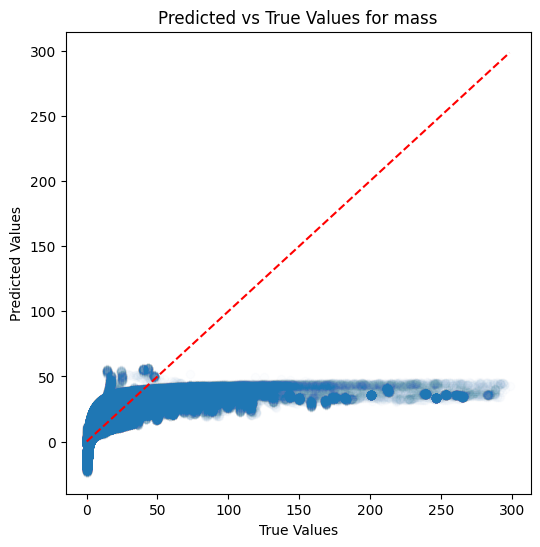

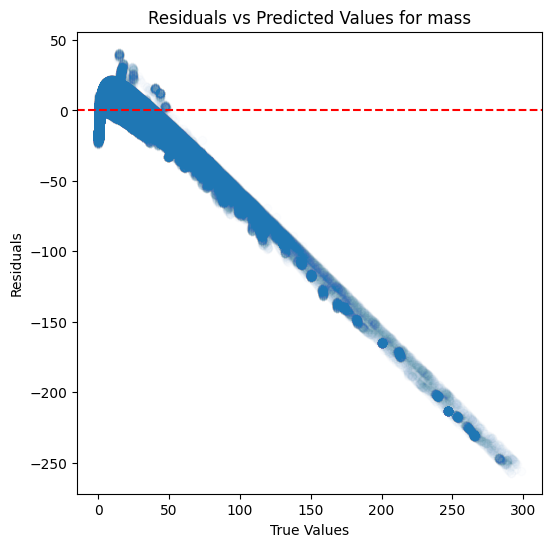

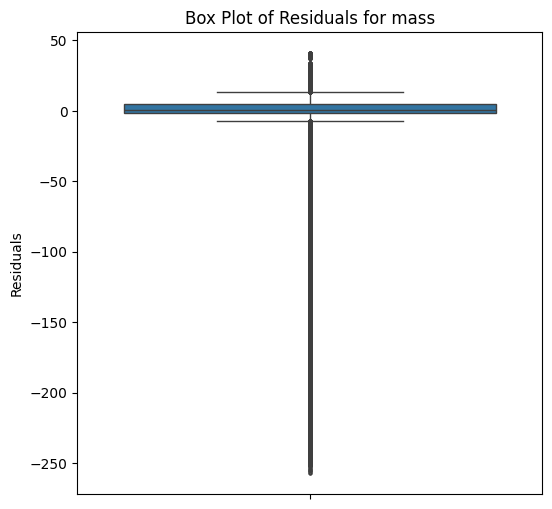

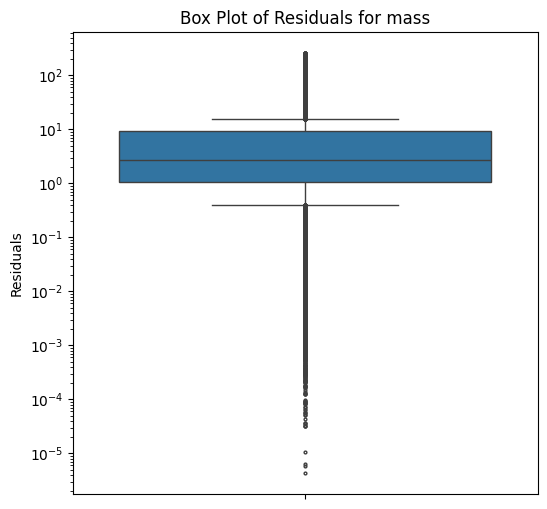

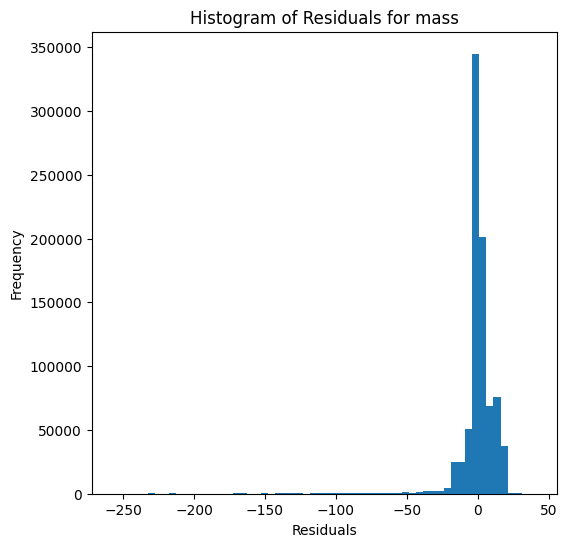

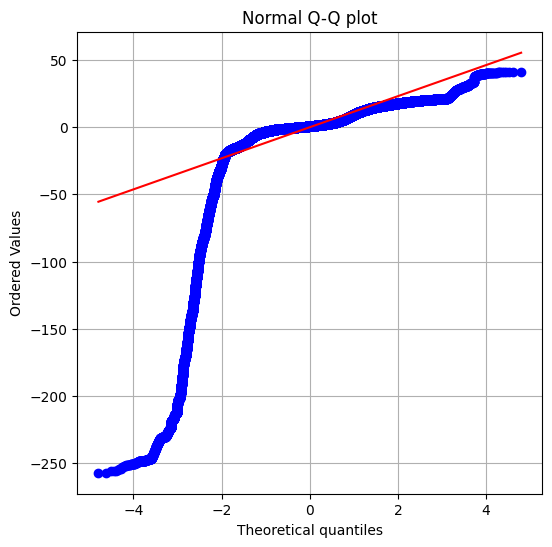


radius results:
RVE :  0.9897611137480969
RMSE :  0.09617751115675367
MAE :  0.07195174148370423
MedAE :  0.05483596363024501
CORR :  0.9948673850057176
MAX_ER :  0.48899646293087007
Percentiles : 
  75th percentile :  0.10008776536594953
  90th percentile :  0.15489263402054904
  95th percentile :  0.2013109382576544
  99th percentile :  0.28425901367673334



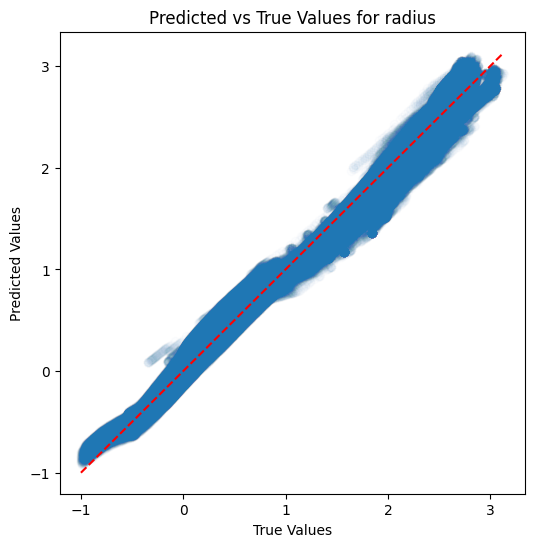

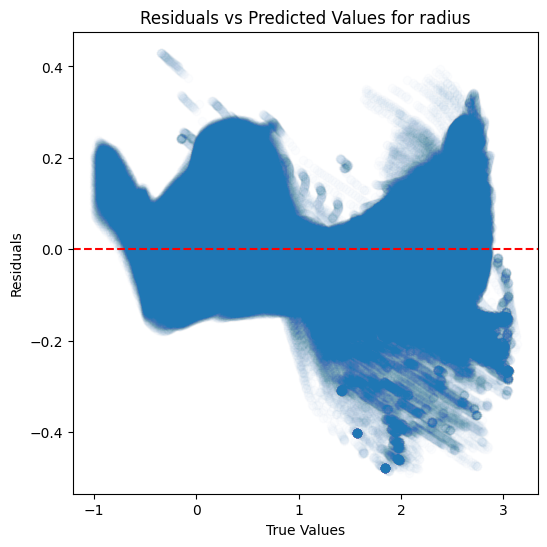

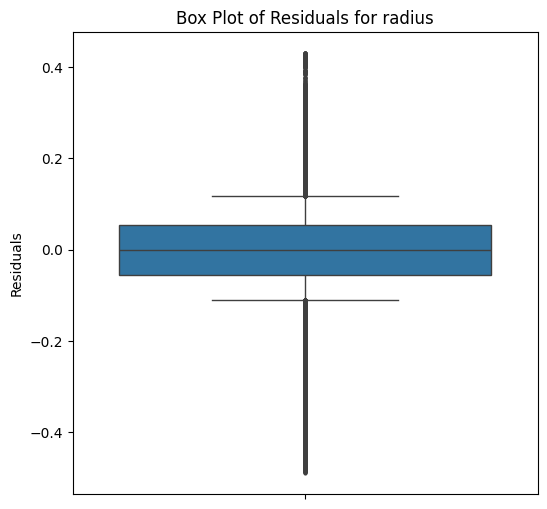

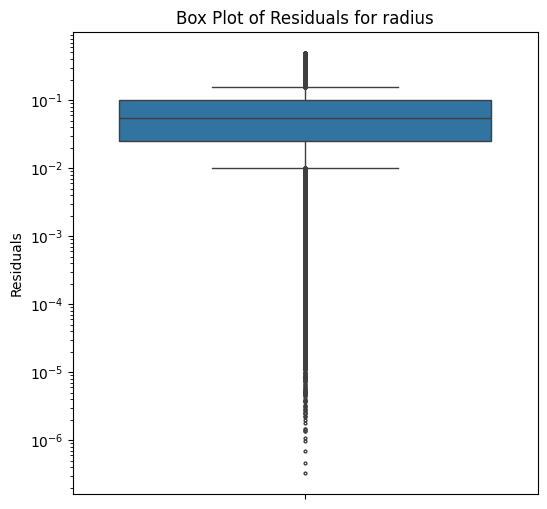

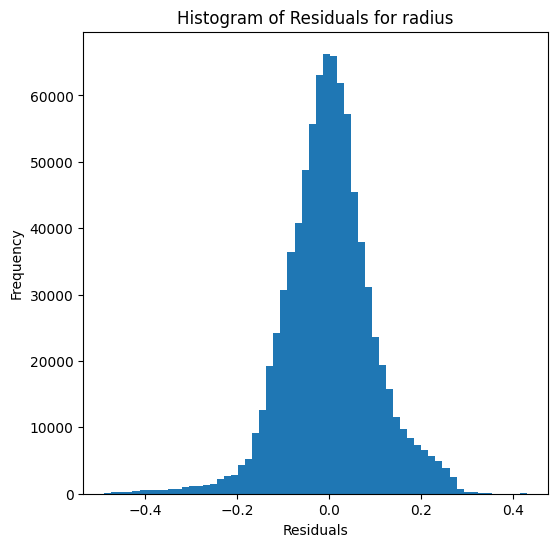

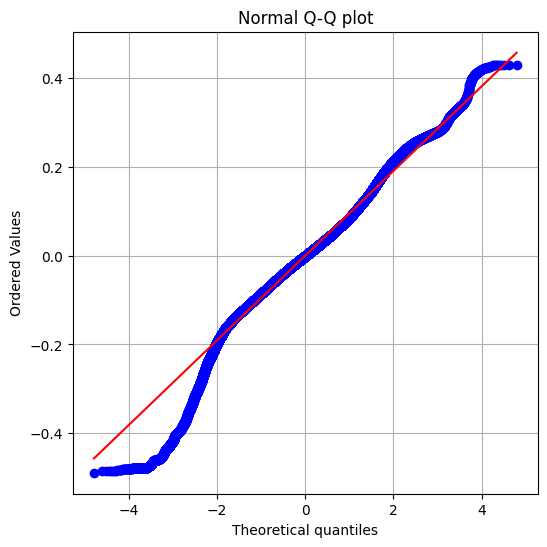

In [8]:
lr_evaluator.evaluate_Kfold_results(LinearRegression, X_train, y_train, "../../../../../../predictions/K_fold", "Base", random_state=12, override=True, use_preds=False)

### Decision tree

In [ ]:
dt_evaluator = Model_evaluator("decision_tree", path="../../../../../../results/K_fold/")


Base train data :
../../../../../results/K_fold/decision_tree/Base/metrics.csv
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9948384294082872
RMSE :  1.457749346770917
MAE :  0.13369773242440813
MedAE :  0.00557307728219314
CORR :  0.9974179246693774
MAX_ER :  179.26024624502963
Percentiles : 
  75th percentile :  0.031644550405561134
  90th percentile :  0.1298449116257625
  95th percentile :  0.2684134074503622
  99th percentile :  2.0655390077769122



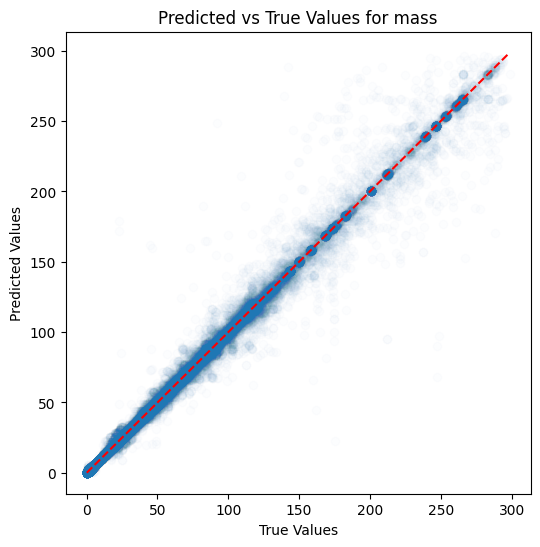

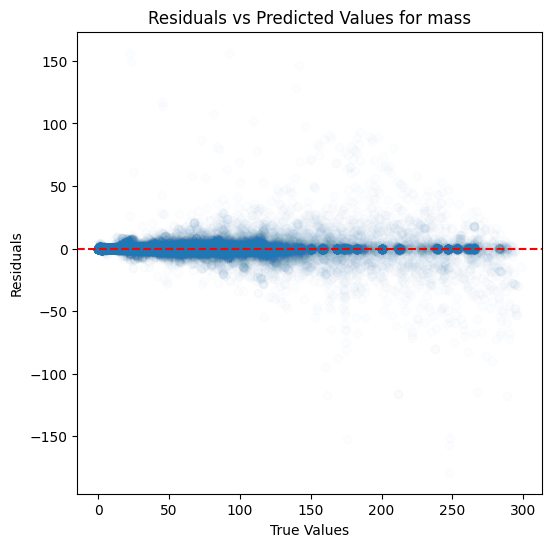

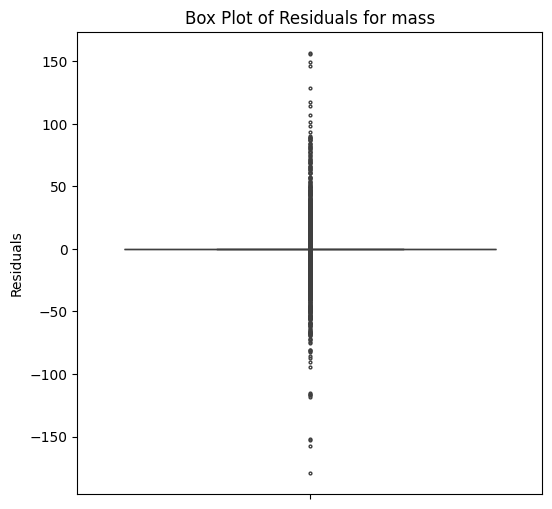

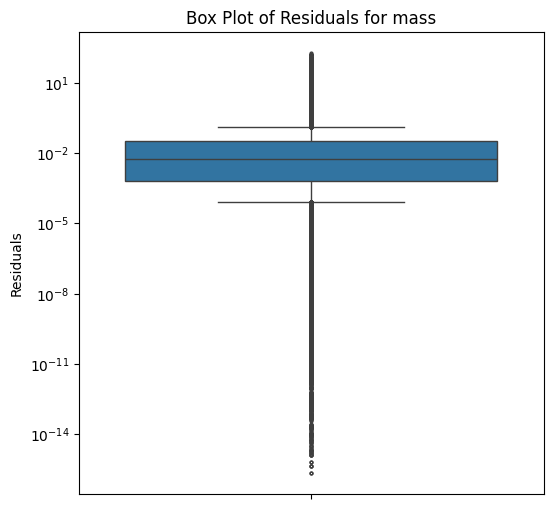

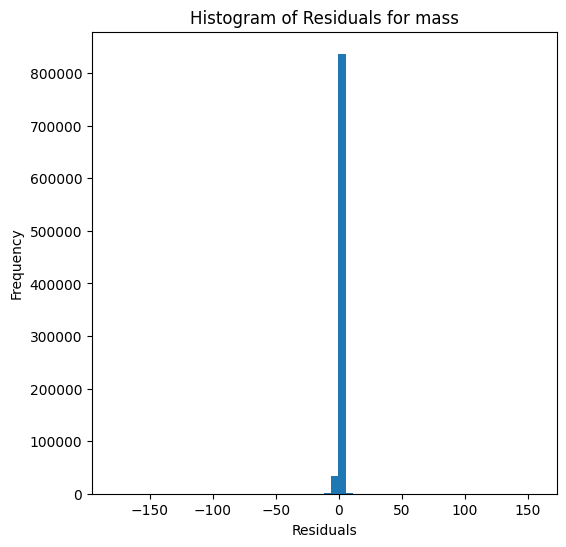

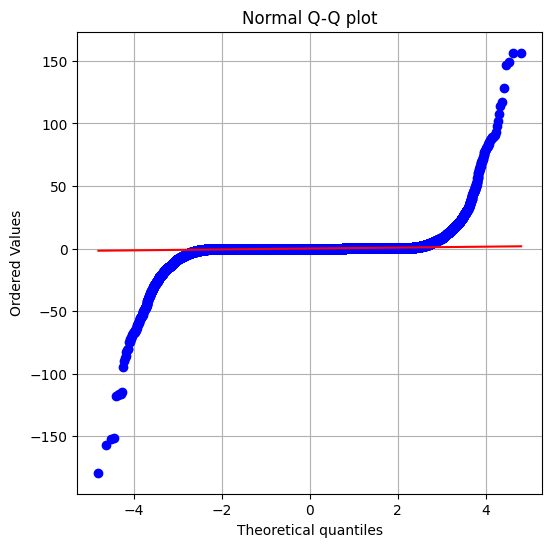


radius results:
RVE :  0.9998085586323131
RMSE :  0.013784167336710375
MAE :  0.007185534135043581
MedAE :  0.0035624236311397883
CORR :  0.9999043112312309
MAX_ER :  0.5192169046615173
Percentiles : 
  75th percentile :  0.008276807958152166
  90th percentile :  0.016424216973006077
  95th percentile :  0.025873599538034586
  99th percentile :  0.05930790416741735



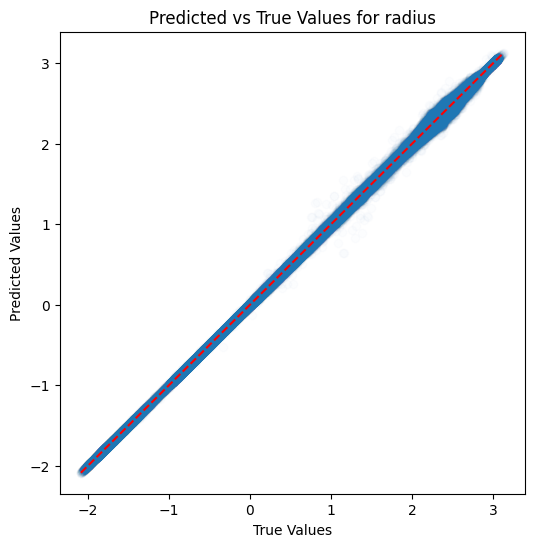

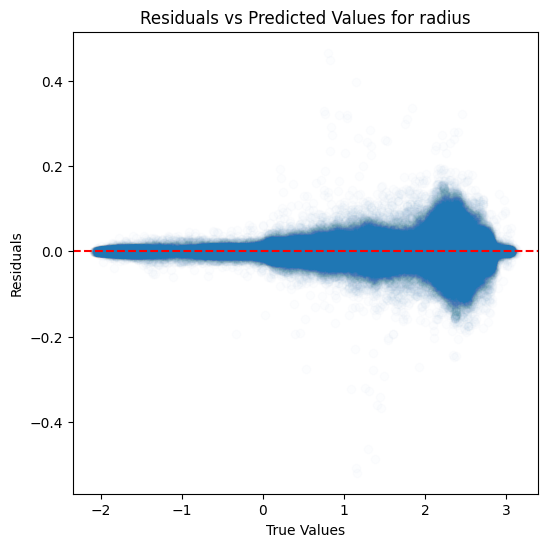

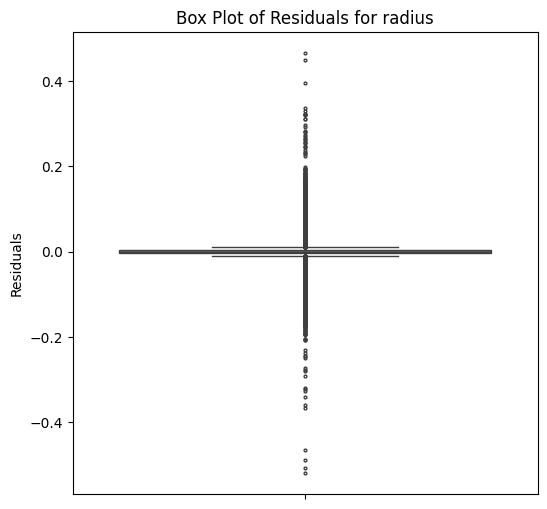

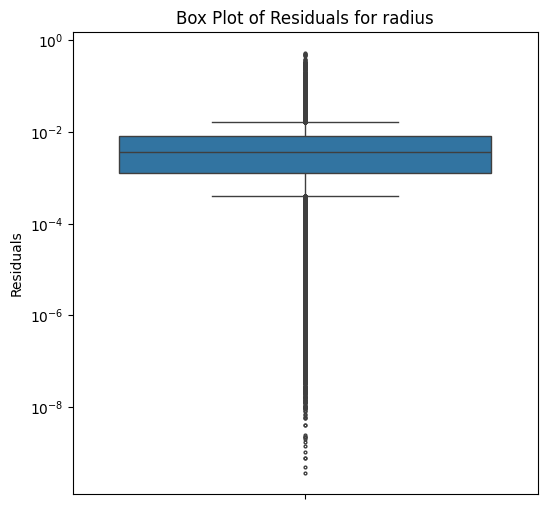

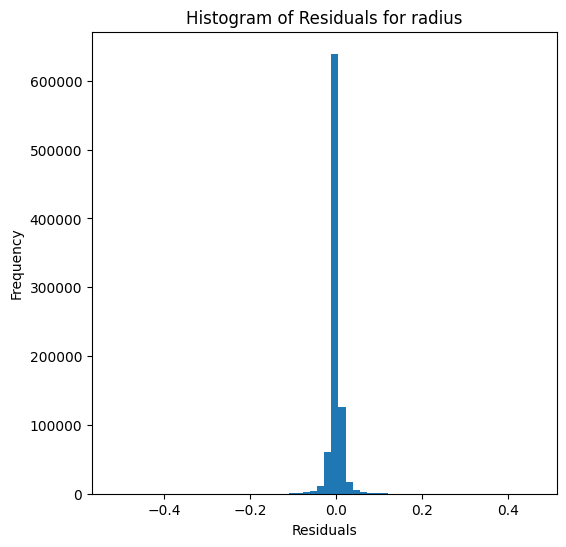

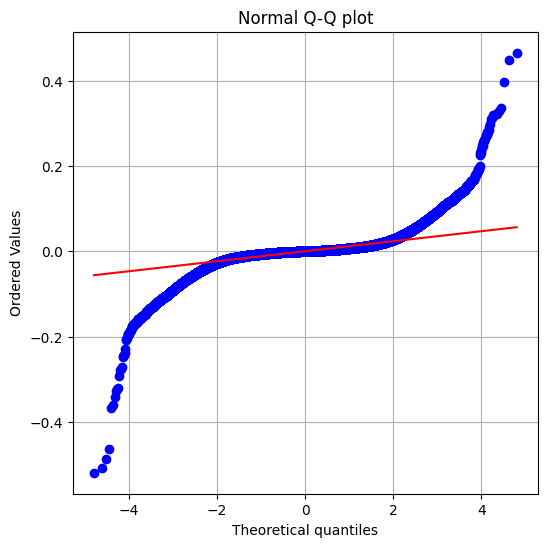

In [ ]:
dt_evaluator.evaluate_Kfold_results(DecisionTreeRegressor, X_train, y_train, "../../../../../../predictions/K_fold", "Base", random_state=12, override=False, use_preds=True)

### K-nearest neighbours

In [ ]:
knn_evaluator = Model_evaluator("KNN", path="../../../../../../results/K_fold/")


Base train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9905931912134948
RMSE :  1.9681387755851416
MAE :  0.20482660993913326
MedAE :  0.014069573371267186
CORR :  0.9953754949202632
MAX_ER :  128.2238920916907
Percentiles : 
  75th percentile :  0.06438968687443983
  90th percentile :  0.18682689950219572
  95th percentile :  0.35715024230270453
  99th percentile :  3.3691547053437914



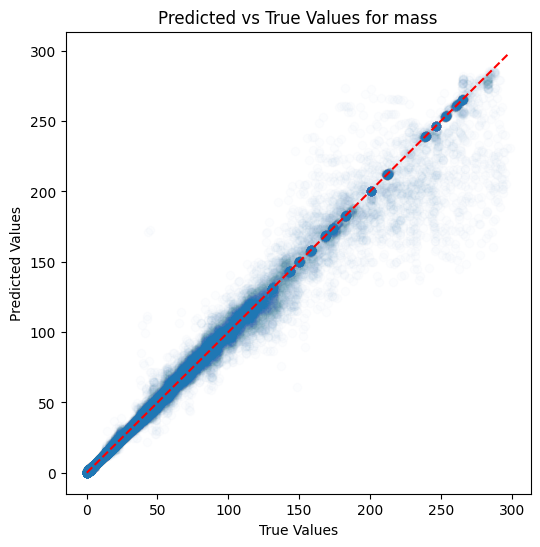

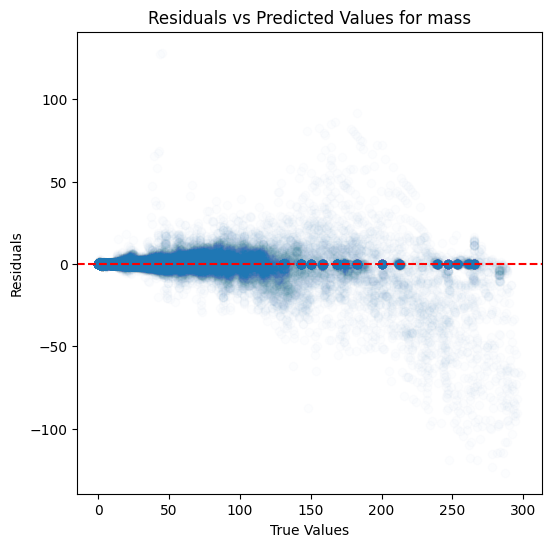

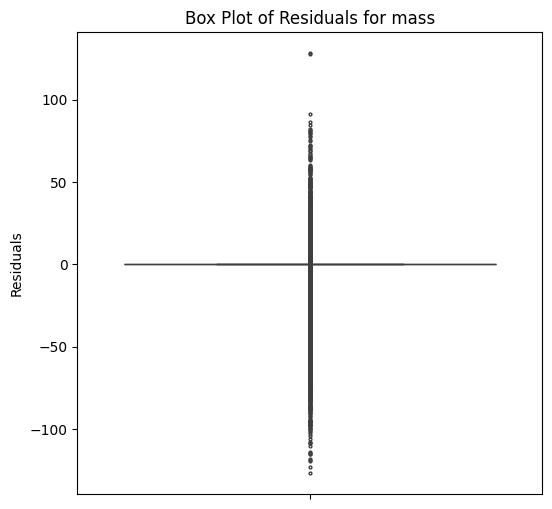

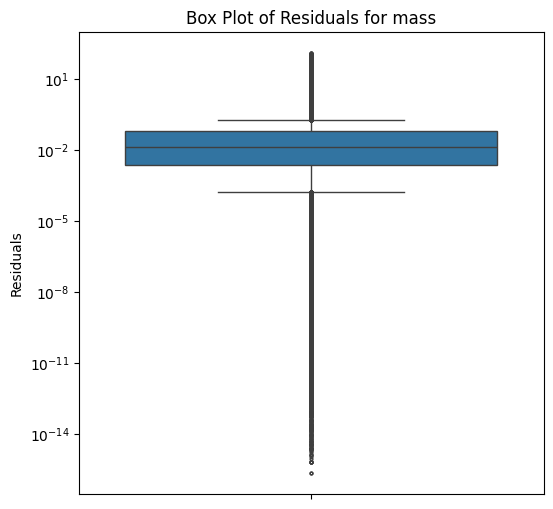

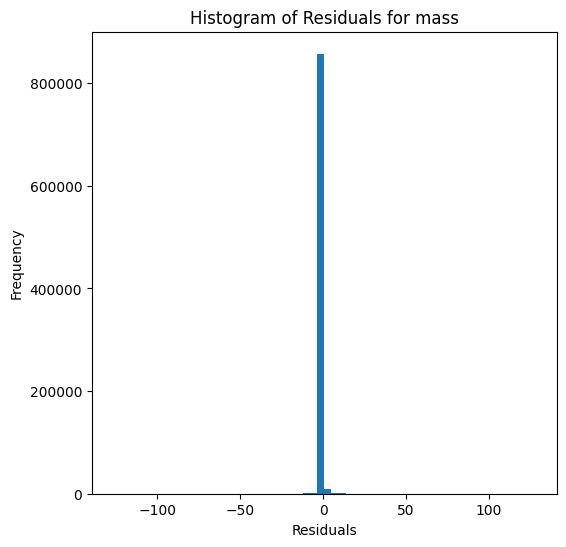

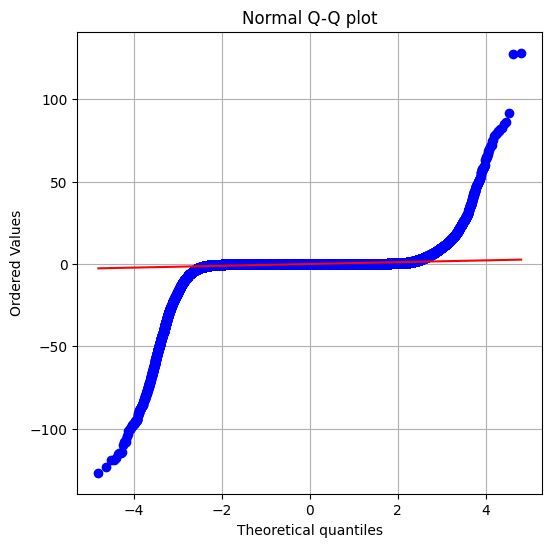


radius results:
RVE :  0.9998524682505924
RMSE :  0.01210091133549416
MAE :  0.006431626922958259
MedAE :  0.00310144223960096
CORR :  0.9999262430656871
MAX_ER :  0.28893637309608644
Percentiles : 
  75th percentile :  0.0072044329939461305
  90th percentile :  0.015325269033916468
  95th percentile :  0.024482395886263015
  99th percentile :  0.05207725395397071



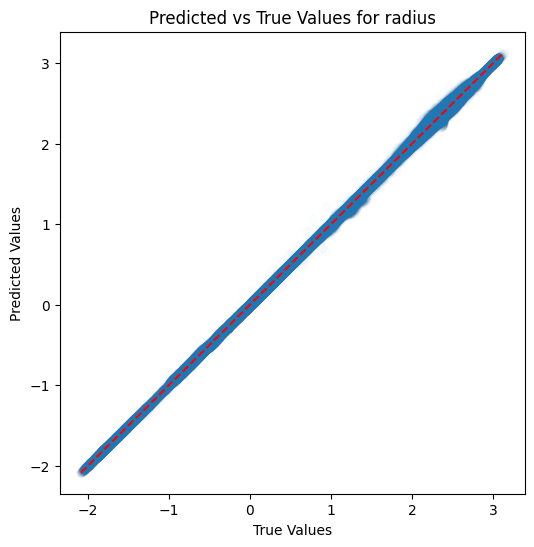

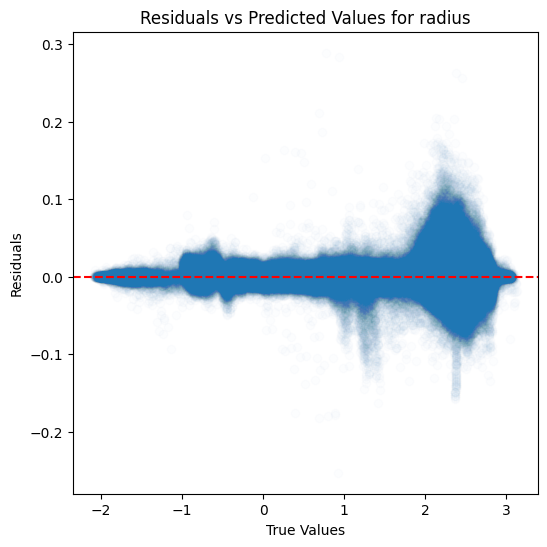

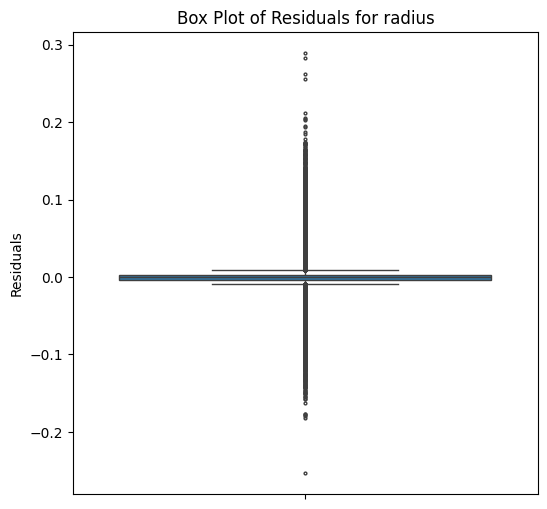

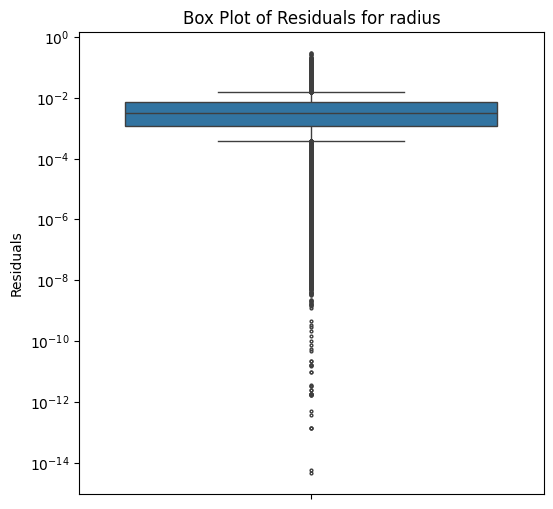

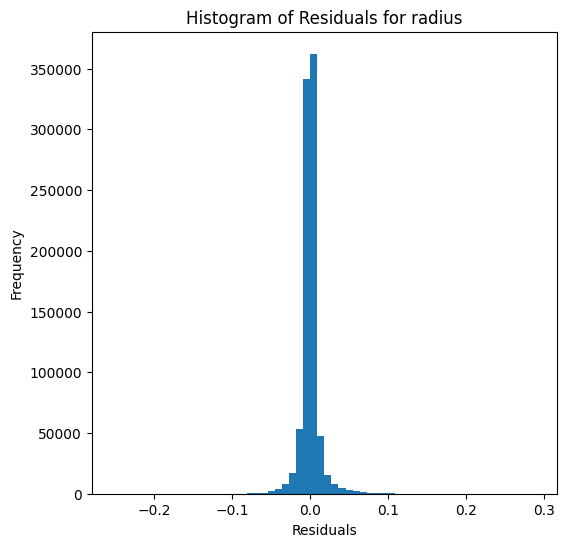

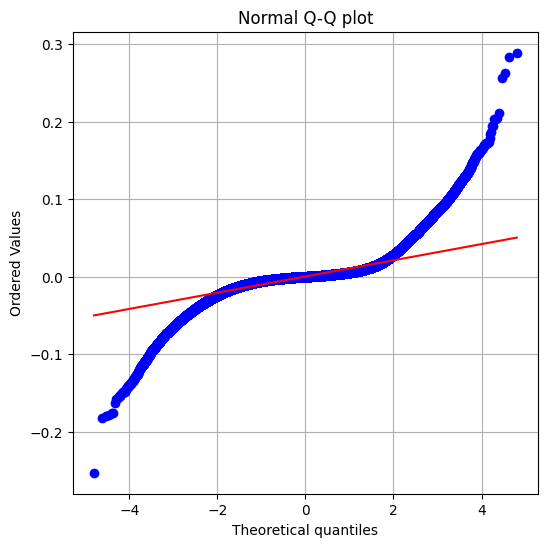

In [ ]:
knn_evaluator.evaluate_Kfold_results(KNeighborsRegressor, X_train, y_train, "../../../../../../predictions/K_fold", "Base", random_state=12, override=False, use_preds=True)

### Random forests

In [ ]:
rf_evaluator = Model_evaluator("random_forest", path="../../../../../../results/K_fold/")


Base train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9977940467562483
RMSE :  0.9529946527009437
MAE :  0.09990053187465175
MedAE :  0.008019487149850457
CORR :  0.9988977609553024
MAX_ER :  125.21925500445558
Percentiles : 
  75th percentile :  0.0329959683630586
  90th percentile :  0.10637529054033712
  95th percentile :  0.20459088351898908
  99th percentile :  1.5386217283931427



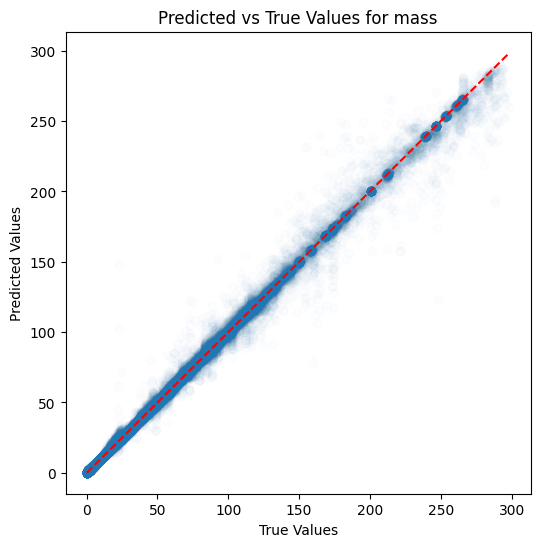

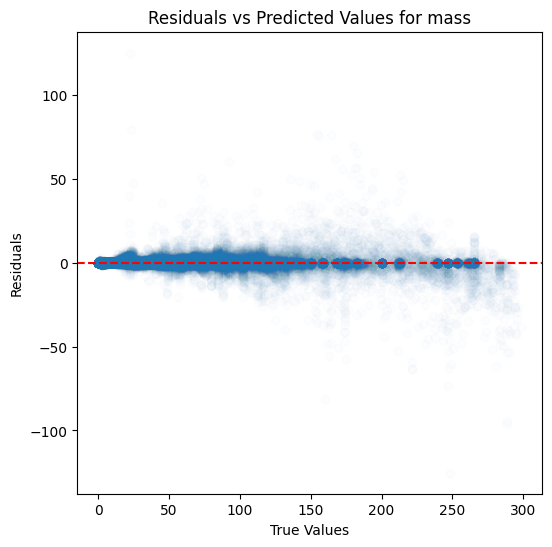

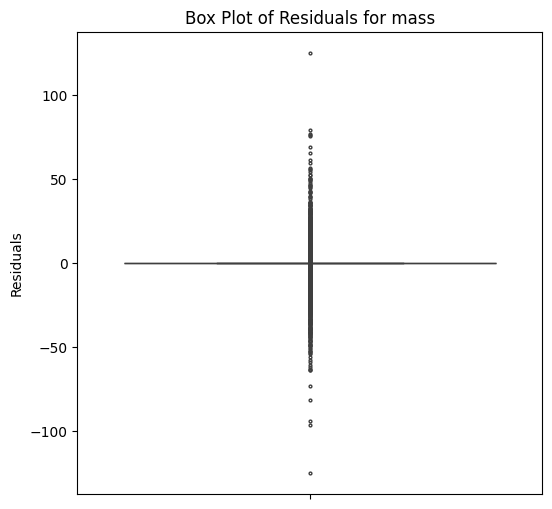

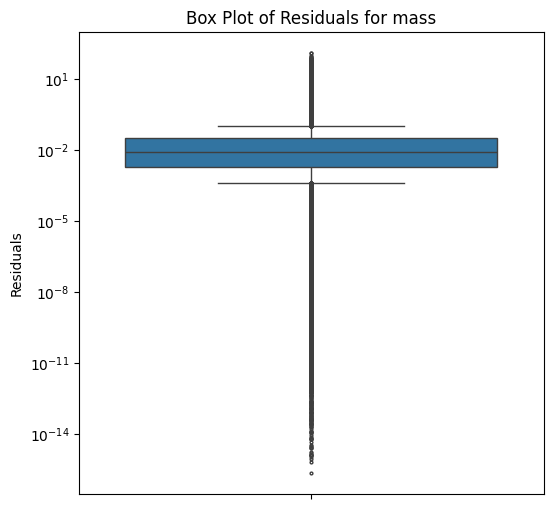

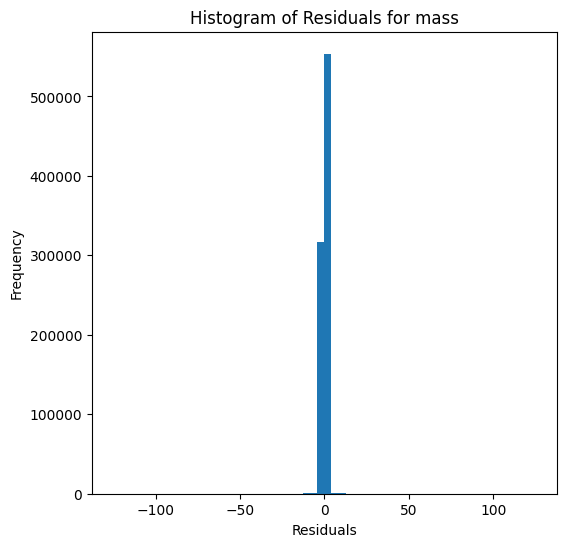

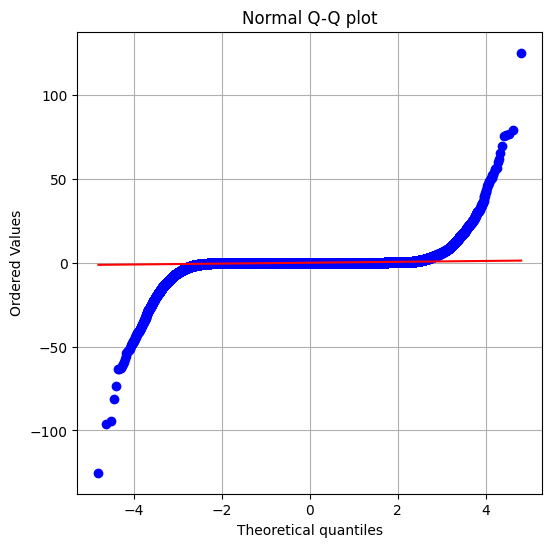


radius results:
RVE :  0.9999138658091802
RMSE :  0.009246215523839234
MAE :  0.004546437889579419
MedAE :  0.0018878644617438822
CORR :  0.999956937498791
MAX_ER :  0.36764590959955445
Percentiles : 
  75th percentile :  0.0049900432130207326
  90th percentile :  0.011172287451150845
  95th percentile :  0.017695198973579292
  99th percentile :  0.04013464550393061



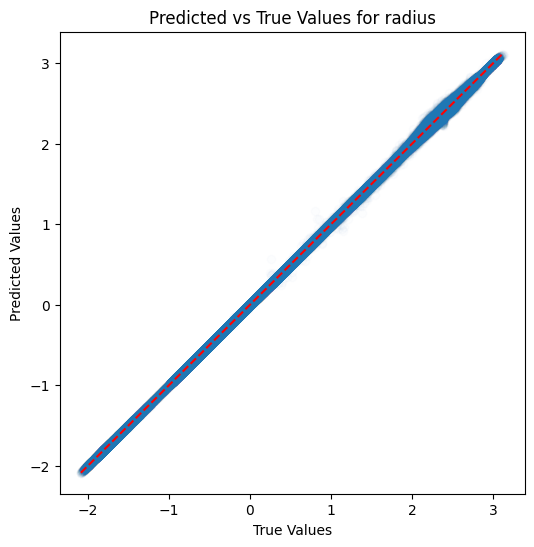

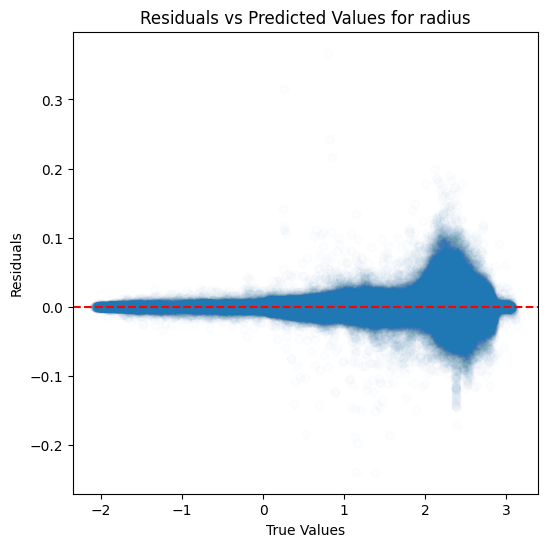

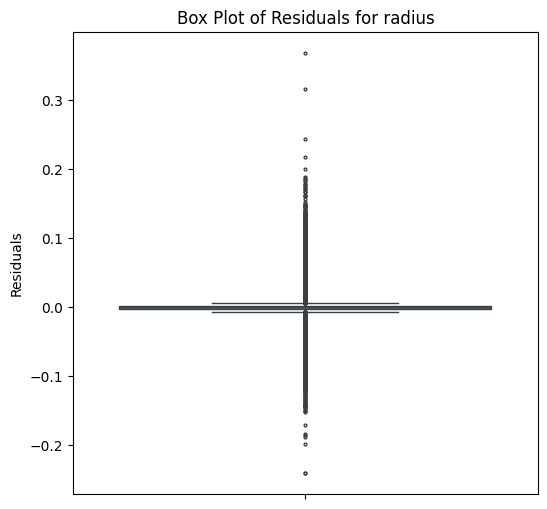

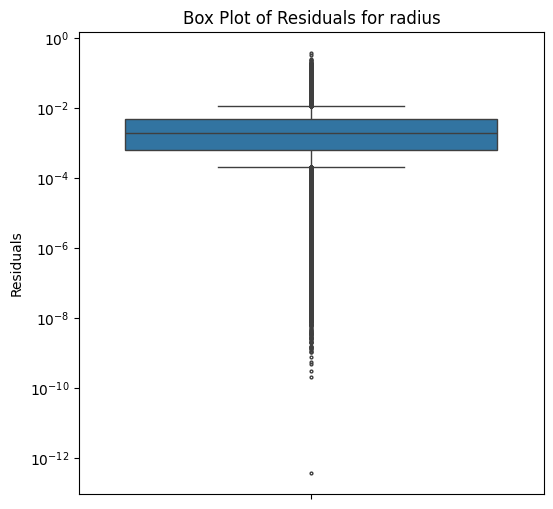

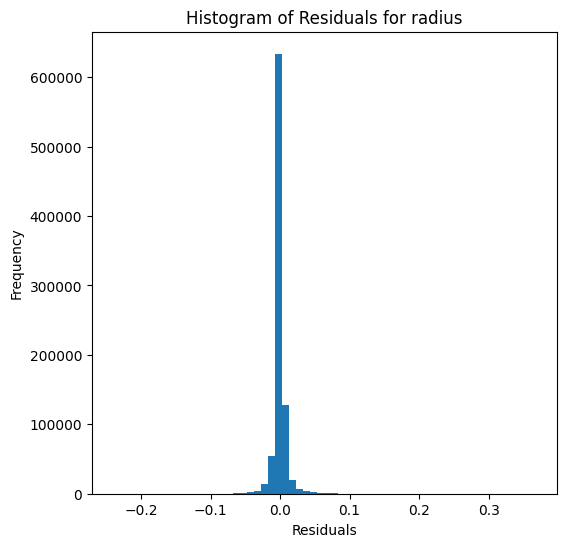

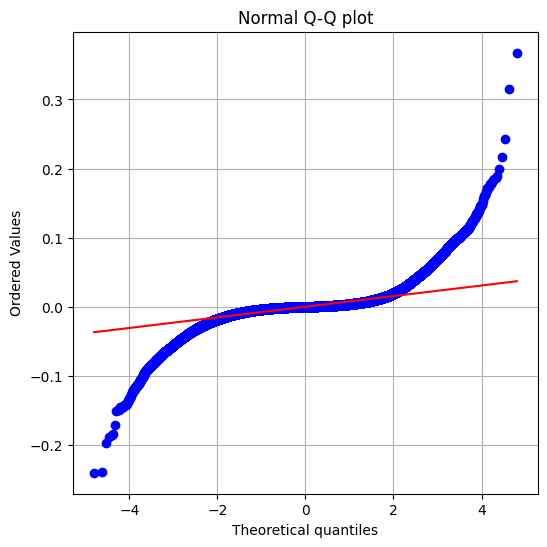

In [ ]:
rf_evaluator.evaluate_Kfold_results(RandomForestRegressor, X_train, y_train, "../../../../../../predictions/K_fold", "Base", random_state=12, override=False, use_preds=True, n_jobs=5)

### XGBoost

In [ ]:
xgb_evaluator = Model_evaluator("xgboost", path="../../../../../../results/K_fold/")


Base train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9929694482759451
RMSE :  1.7013224840647478
MAE :  0.39586139478702637
MedAE :  0.10469884599800827
CORR :  0.9964796009178346
MAX_ER :  109.35920196458784
Percentiles : 
  75th percentile :  0.2512826400517384
  90th percentile :  0.5826810542029814
  95th percentile :  1.2587555213325987
  99th percentile :  5.98770106485794



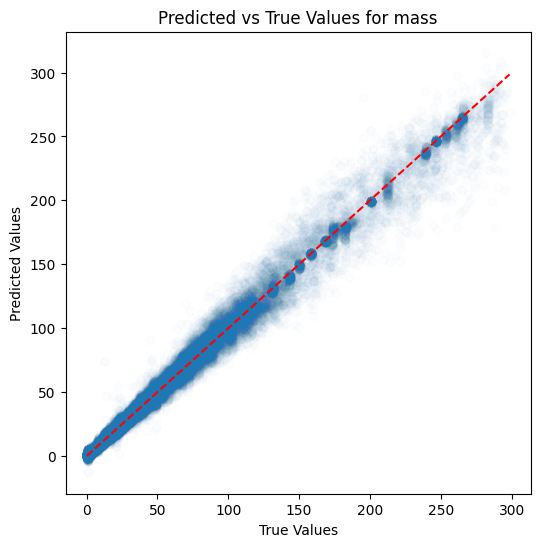

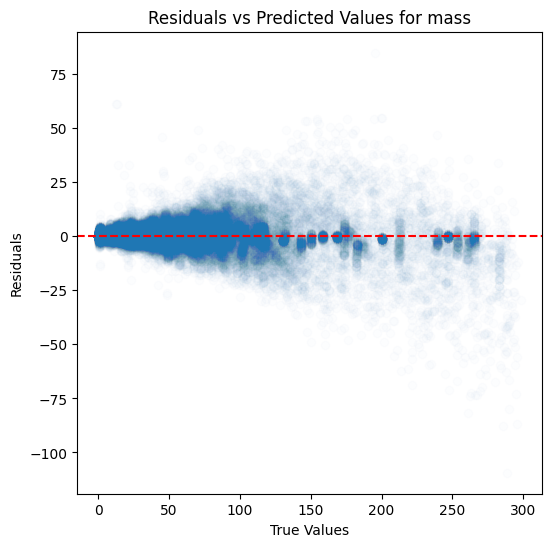

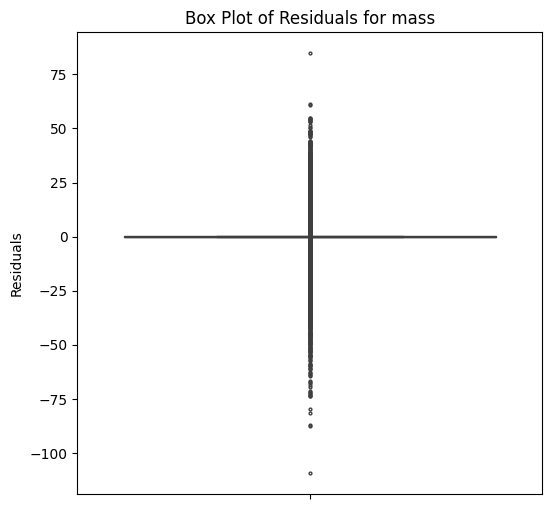

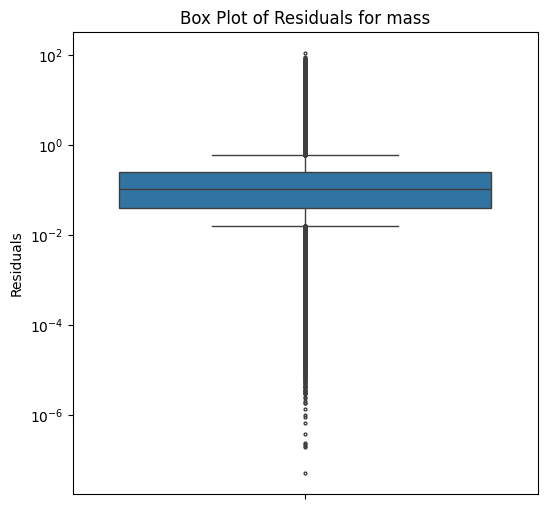

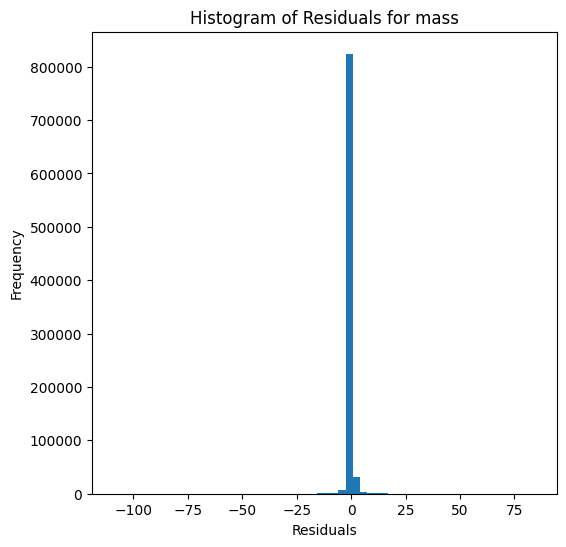

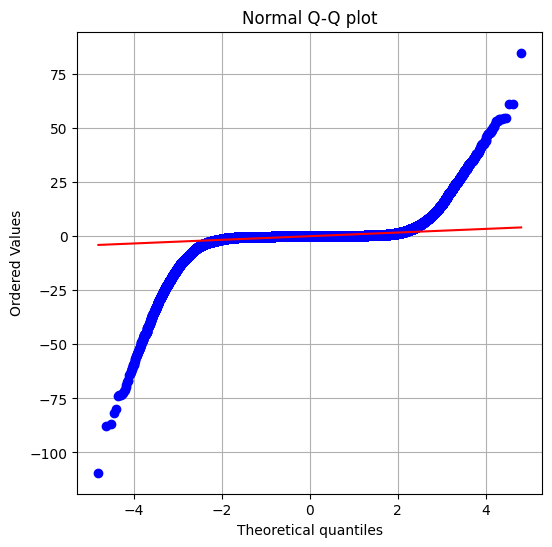


radius results:
RVE :  0.9994217483263456
RMSE :  0.02395607150171224
MAE :  0.01524043677301111
MedAE :  0.011170646564808387
CORR :  0.9997108365049165
MAX_ER :  0.5815845423411247
Percentiles : 
  75th percentile :  0.020083835454860623
  90th percentile :  0.03137351963360766
  95th percentile :  0.04060608008484646
  99th percentile :  0.06959694486312917



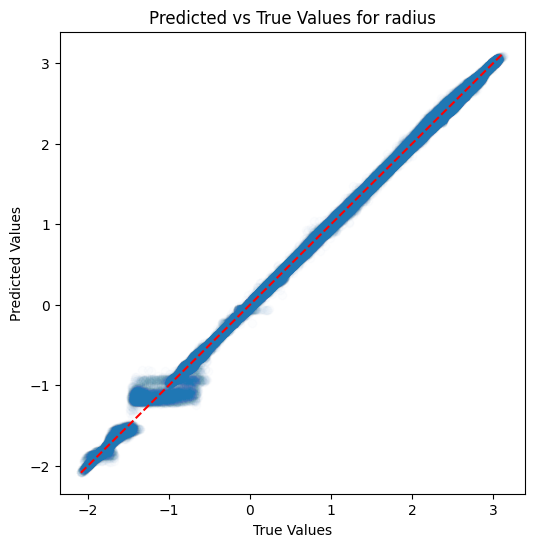

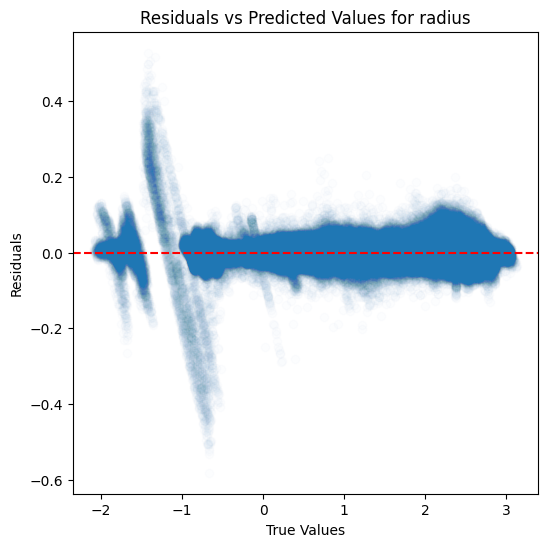

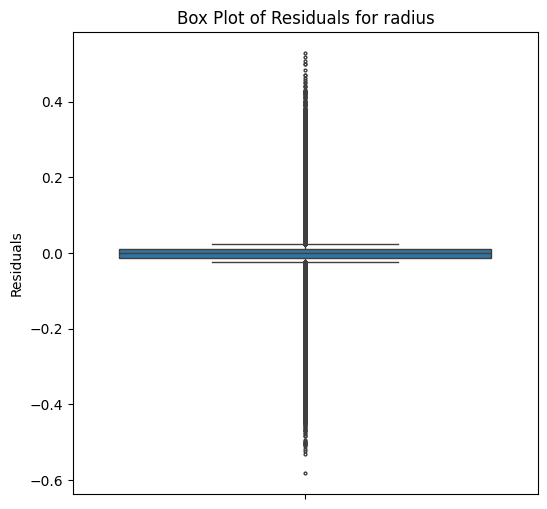

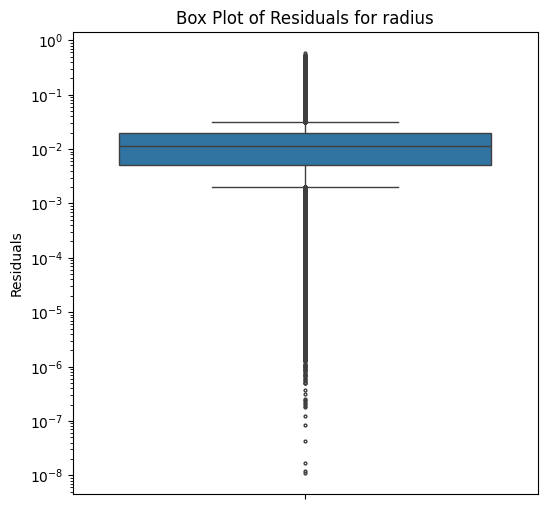

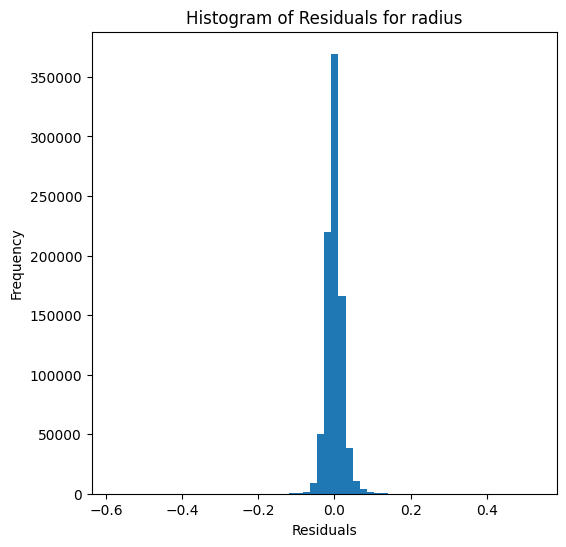

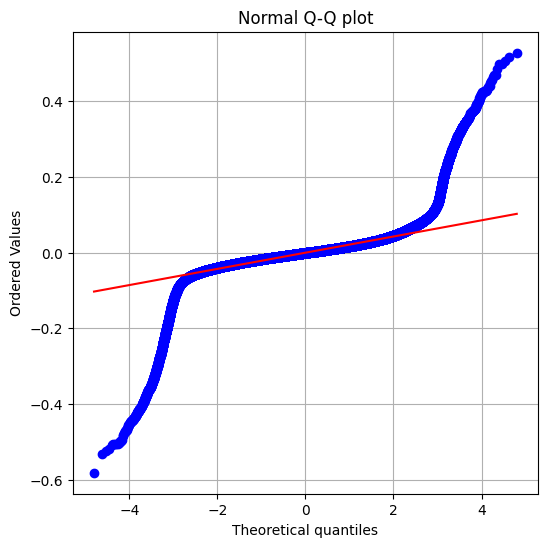

In [ ]:
xgb_evaluator.evaluate_Kfold_results(XGBRegressor, X_train, y_train, "../../../../../../predictions/K_fold", "Base", random_state=12, override=False, use_preds=True, n_jobs=5)

### Multi-layer perceptron

In [14]:
mlp_evaluator = Model_evaluator("mlp", path="../../../../../../results/K_fold/")


Base train data :
split 1 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


2.108650714780855
2 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


2.1525846983877472

mass results:
RVE :  0.9461476308858695
RMSE :  4.760352986320407
MAE :  1.5918361194098931
MedAE :  0.5520650041393612
CORR :  0.9743696783754635
MAX_ER :  173.88991040143412
Percentiles : 
  75th percentile :  1.1677038367686752
  90th percentile :  3.0792722696491195
  95th percentile :  5.690686447299387
  99th percentile :  19.814476824436586



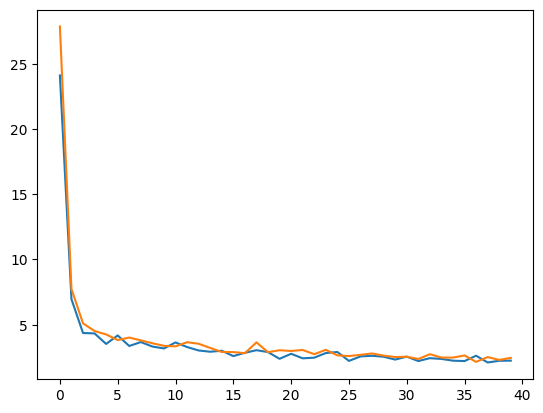

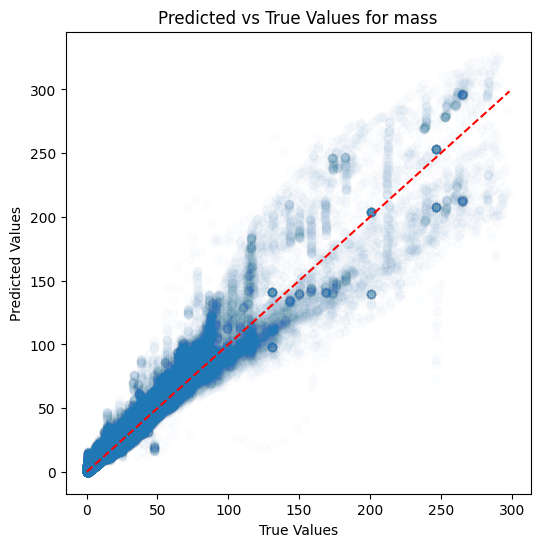

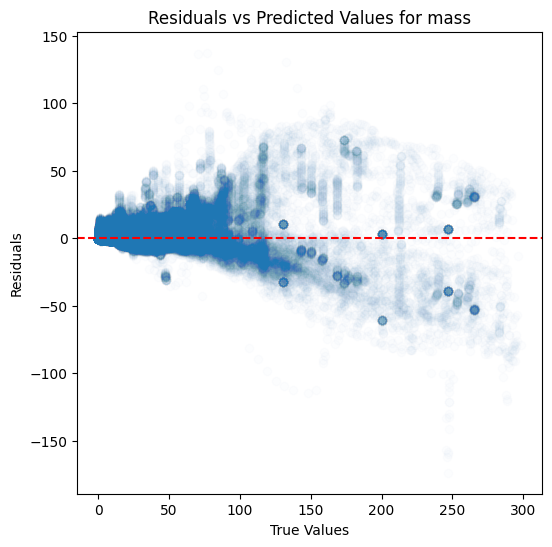

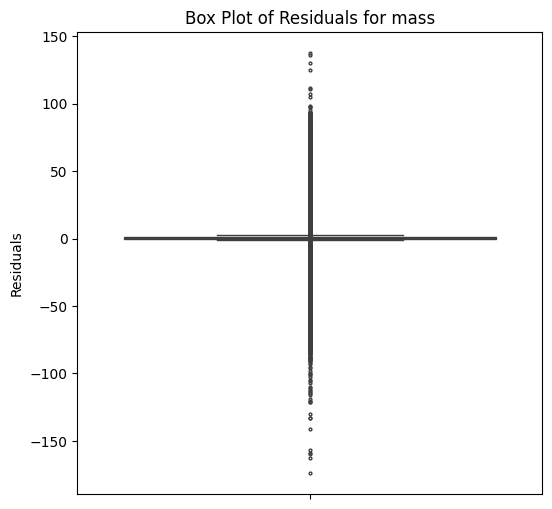

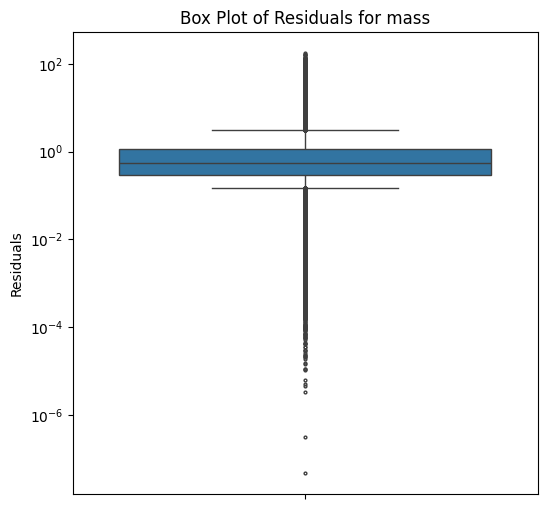

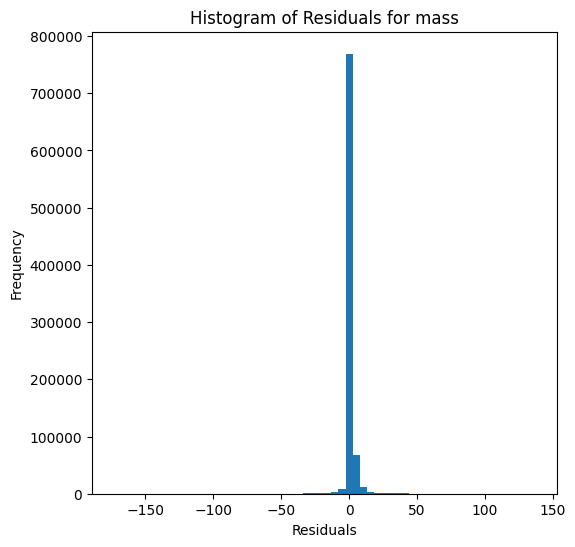

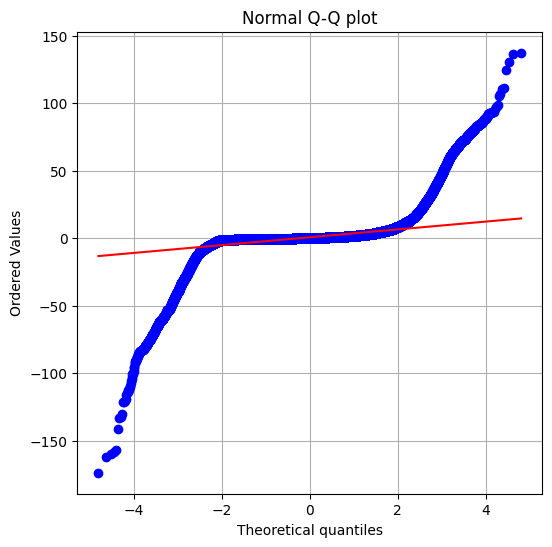


radius results:
RVE :  0.984666517129148
RMSE :  0.1276840901014204
MAE :  0.09859299293238374
MedAE :  0.08525365174094401
CORR :  0.9923069685475584
MAX_ER :  0.88662413679069
Percentiles : 
  75th percentile :  0.13101946615835997
  90th percentile :  0.1869549106985117
  95th percentile :  0.23498916580759366
  99th percentile :  0.41123074231255113



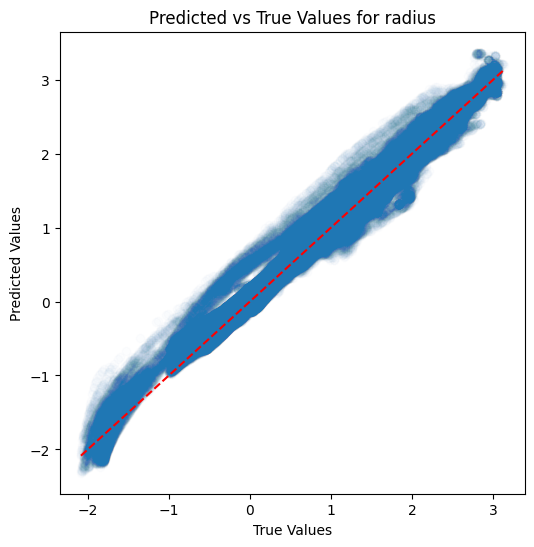

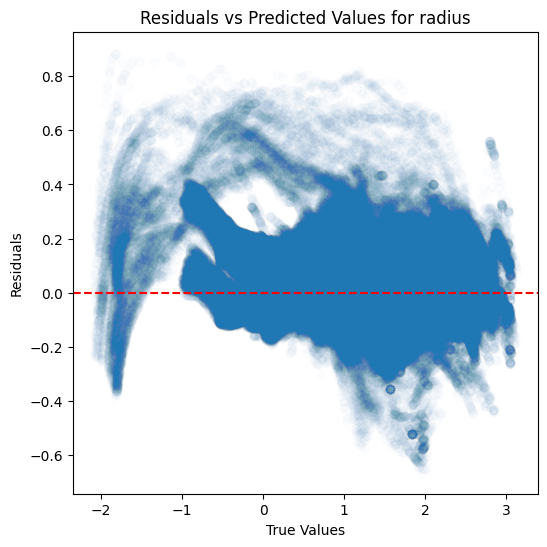

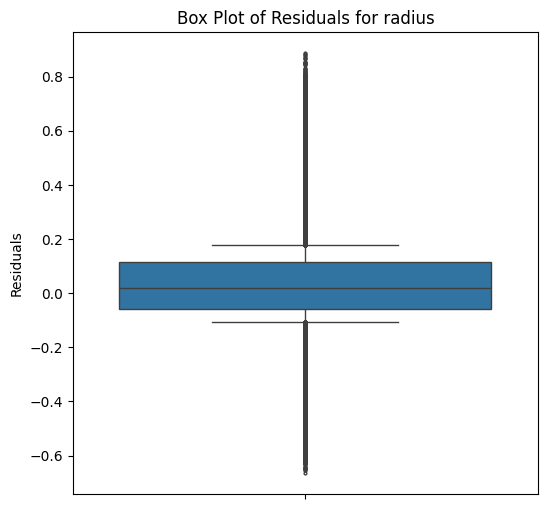

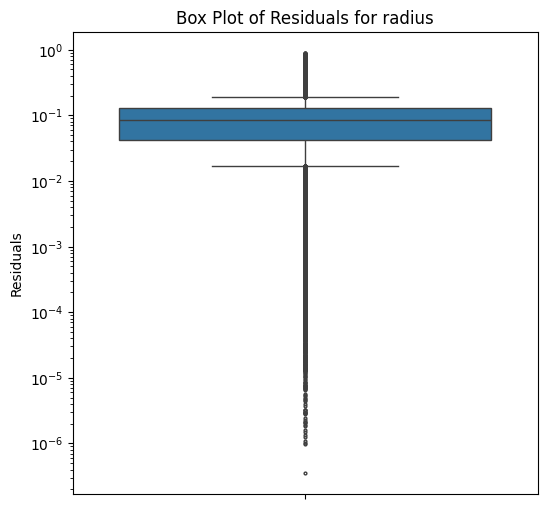

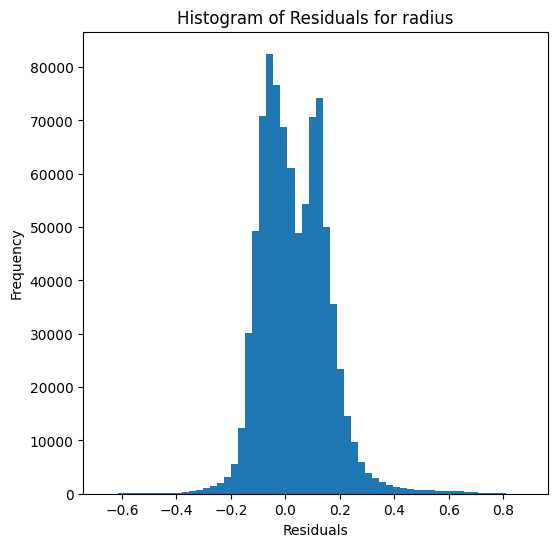

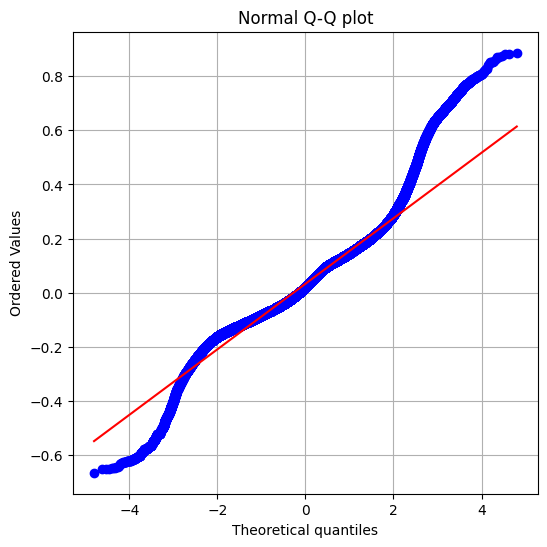

In [ ]:
mlp_evaluator.evaluate_Kfold_results(MLPRegressor, X_train, y_train, "../../../../../../predictions/K_fold", "Base", n_splits=2, random_state=12, override=True, use_preds=False, hidden_layer_sizes = (100, 100), max_iter=20, batch_size=200)

Avec batch_size=auto (200):

plus de 30 minutes pour entrainer un seul split de Kfold avec les paramètres par défaut (1 hidden layer de taille 100)

plus de 15 minutes pour entrainer un seul split de Kfold avec les 1 hidden layer de taille 10

- et max_iter=20, hidden_layer_sizes=(100, 50, 25): ~5 minutes par fold (plutôt bon résultats)
- et max_iter=20, hidden_layer_sizes=(100, 100, 100): ~5 minutes par fold

Avec batch_size=400:


Avec learning_rate= :


print le graphe de la loss au cours du temps